# Carga de Librerias a utilizar

In [23]:
import sys
sys.path.append('../src')

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv 
import os
from helper import Funciones

# Forma de instalar librerias
pip install python-dotenv
pip install mysql-connector-python


In [25]:
import warnings
warnings.filterwarnings('ignore')

# Carga de datos

In [27]:
fun= Funciones('../bd/conexion.env')

In [30]:
engine = fun.crear_conexion_mysql()
df_acceso_por_tecnologia = pd.read_sql_table('internet_accesos_tecnologia', con=engine)

In [31]:
df_acceso_por_tecnologia.head(3)

,idTabla,año,trimestre,provincia,adsl,cableModem,fibraOptica,wireless,otros,total
0,1,2023,4,Buenos Aires,223391.0,2797700.0,1784590.0,137993.0,67943.0,5011620.0
1,2,2023,4,Capital Federal,58700.0,1198840.0,182520.0,4492.0,29820.0,1474370.0
2,3,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0


# Identificación de tipo de variables

Para analizar los datos primero los tengo que explorar, conocer las variables y para esto grafico las variables cuantitativas y las variables cualitativas.

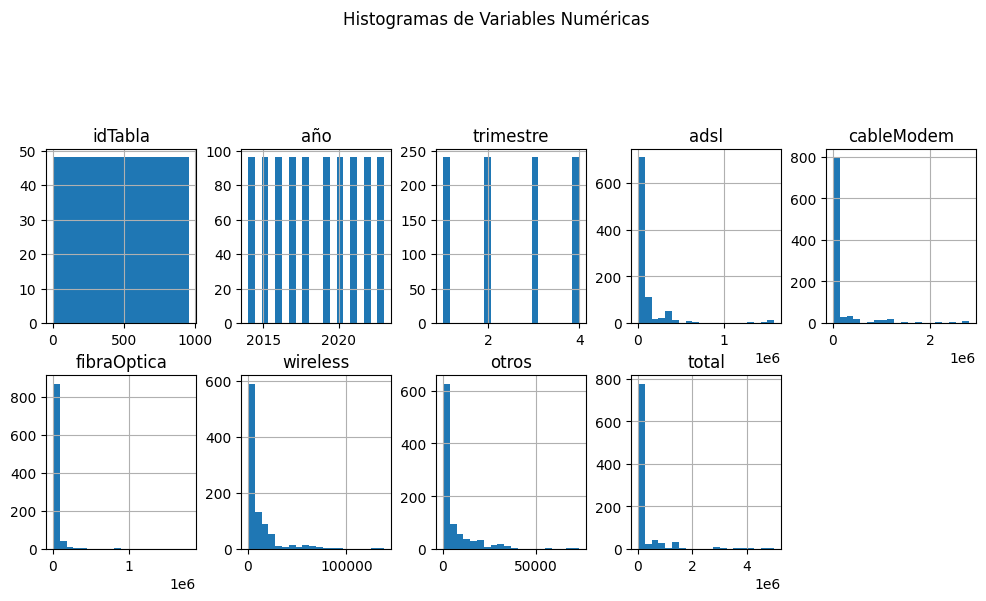

In [32]:

df_acceso_por_tecnologia
df_acceso_por_tecnologia.hist(bins=20, figsize=(12, 14), layout=(5, 5))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

Podemos observar la existencia de 6 variables numéricas,y observamos que en la variable cablemodem se sitúa el mayor número de accesos seguido de fibra óptica y ADSL, son cantidades alrededor de millones.

Graficamos las variables cualitativas para para darme contexto sobre los valores que hay

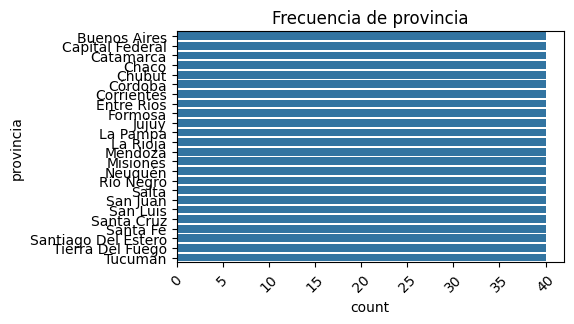

In [33]:
categorical_columns = df_acceso_por_tecnologia.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(df_acceso_por_tecnologia[col], order=df_acceso_por_tecnologia[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
df_acceso_por_tecnologia.columns

# Identificación de Outlayers

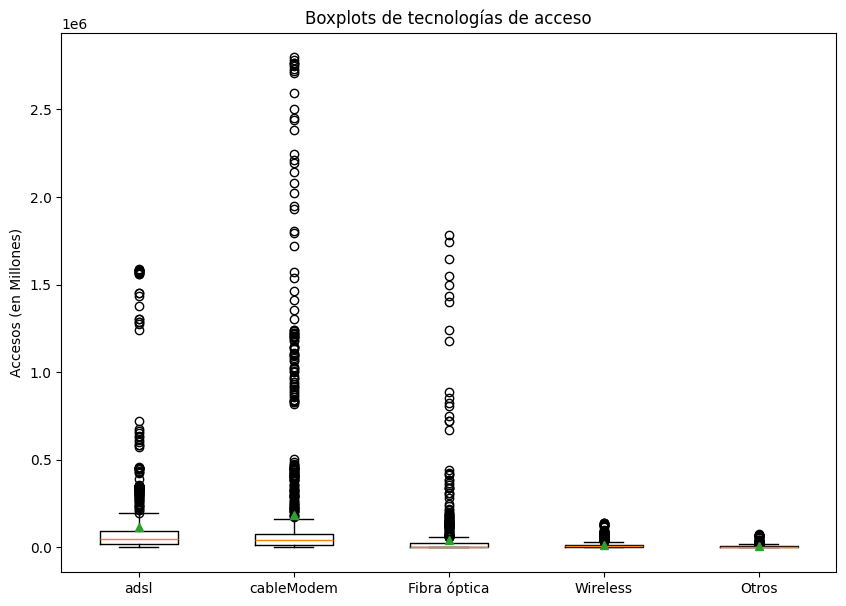

In [34]:
# Crear un gráfico de boxplots para varias columnas
plt.figure(figsize=(10, 7))
# Pasar los datos de las columnas como una lista a plt.boxplot
plt.boxplot([df_acceso_por_tecnologia['adsl'], df_acceso_por_tecnologia['cableModem'], df_acceso_por_tecnologia['fibraOptica'], df_acceso_por_tecnologia['wireless'],df_acceso_por_tecnologia['otros']],showmeans=True)
# Configurar los nombres de las etiquetas en el eje x
plt.xticks([1, 2, 3, 4,5], ['adsl', 'cableModem', 'Fibra óptica','Wireless', 'Otros'])
# Títulos y etiquetas
plt.title("Boxplots de tecnologías de acceso")
plt.ylabel("Accesos (en Millones)")

# Mostrar el gráfico
plt.show()

In [ ]:
df_acceso_por_tecnologia['adsl'].describe()
#df_acceso_por_tecnologia['Cablemodem'].describe()
#df_acceso_por_tecnologia['Cablemodem'].mean() # 181,634.990625
#df_acceso_por_tecnologia['Cablemodem'].median()# 39,670

Podemos observar que en promedio hay alrededor de 50 000 accesos por tecnología, siendo 100 000 accesos aproximandamente el valor  en el que cae el 75% de los conteos en ADSL y Cablemodem
En ADSL, Cablemodem y fibra óptica se presentan outlayers que afectan el promedio


# Realización de agrupaciones para obtener hallazgos

Agrupamos el total por Provincia para obtener el top 3 de accesos

In [ ]:
total_por_provincia=df_acceso_por_tecnologia.groupby('provincia')['total'].sum().sort_values(ascending=False)

In [ ]:
# Calculo porcentajes por provincia
porcentaje = (total_por_provincia / total_por_provincia.sum()) * 100

# Agregar los porcentajes como una nueva columna en el DataFrame resultante
df_resultante = pd.DataFrame({'Total': total_por_provincia, 'Porcentaje': porcentaje})

# Mostrar el DataFrame resultante
print(df_resultante)

Ahora vamos al detalle para ver si se tiene algun cambio por lo que Agrupamos por provincia y tipo de tecnología

In [ ]:
"""_summary_
'ADSL', 'Cablemodem', 'Fibra óptica','Wireless', 'Otros', 'Total'
"""
df_adsl=df_acceso_por_tecnologia.groupby('provincia')['adsl'].sum().sort_values(ascending=False)
df_adsl.head(3)

In [ ]:
df_cable=df_acceso_por_tecnologia.groupby('provincia')['cableModem'].sum().sort_values(ascending=False)
df_cable.head(3)

In [ ]:
df_fibra=df_acceso_por_tecnologia.groupby('provincia')['fibraOptica'].sum().sort_values(ascending=False)
df_fibra.head(10)

In [ ]:
df_wireless=df_acceso_por_tecnologia.groupby('provincia')['wireless'].sum().sort_values(ascending=False)
df_wireless.head(3)

# Cálculo de porcentajes de participación
Calculé los porcentajes para ver la participación de San Luis que toma un segundo lugar por tipo de tecnología wireless

In [ ]:
df_wl=df_acceso_por_tecnologia.groupby('provincia')['wireless'].sum().sort_values(ascending=False)
# Calcular los porcentajes
porcentaje = (df_wl / df_wl.sum()) * 100
# Agregar los porcentajes como una nueva columna en el DataFrame resultante
df_resultante = pd.DataFrame({'Total': df_wl, 'Porcentaje': porcentaje})
# Mostrar el DataFrame resultante
print(df_resultante)

Al ver el total del acceso por tecnologia la primer impresión es que el top 3 son:
Buenos Aires con el 42% (147 835 485.0 )<br>
Capital Federal con el 16% (56572289.0)<br>
Córdoba con el 9% (31582106.0)<br>
de el acceso no tomando en cuenta la tecnologia por la cual son los accesos.

-Llama la atención San Luis, que toma el segundo lugar cuando el tipo de tecnologia es wireless con el 12 % 

In [ ]:
agrupacion=df_acceso_por_tecnologia.groupby(['provincia','año'])['total'].sum().sort_values(ascending=False)
type(agrupacion)

# Graficamos para ver de manera general las provincias con sus accesos por año

In [ ]:
# Graficar los datos agrupados
agrupacion.unstack().plot(kind='bar', stacked=True)

# Configuración del gráfico
plt.title('Total por Año y Provincia')
plt.xlabel('Año')
plt.ylabel('Total de accesos')
plt.legend(title='Provincia', loc='upper right')

# Mostrar el gráfico
plt.show()

Podemos ver que las provincias que destacan en el número de accesos de manera General a través de los años

In [ ]:
agrupacion.index
agrupacion.values

In [ ]:
# Desempaquetar el índice multinivel
df_unstacked = agrupacion.unstack(level=0)

In [ ]:
# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar cada provincia en la misma gráfica
for columna in df_unstacked.columns:
    plt.plot(df_unstacked.index, df_unstacked[columna], marker='o', linestyle='-', label=columna)

# Configurar el título y las etiquetas
plt.title('Valores por Provincia y Año')
plt.xlabel('Año')
plt.ylabel('Valores de conexiones')
plt.legend(title='Provincia')

# Mostrar la gráfica
plt.show()

De acuerdo a la grafica solo en 4 provincias hay crecimiento año con año, las demás provincias quedan casi constantes.<br>
Hay un leve crecimiento en Tucumán y Mendoza a partir de 2020

Ahora exploraremos la correlación entre variables númericas

In [ ]:
df_acceso_por_tecnologia.columns

In [ ]:
df_acceso_por_tecnologia.head(3)

In [ ]:
selected_columns = ['año', 'trimestre', 'adsl', 'cableModem','fibraOptica', 'wireless', 'otros']
#new_df = df[selected_columns]
df_numerico=df_acceso_por_tecnologia[selected_columns]
df_numerico.columns

# Correlaciones

In [ ]:
plt.figure(figsize = (12,4)) 
sns.heatmap(df_numerico.corr()) 
plt.show()

Podemos apreciar que si hay una correlación entre cableModem con adsl y fibra óptica con adsl

In [ ]:
# tecnologia vs año
sns.set(style="whitegrid")

In [ ]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='año', y='total', data=df_acceso_por_tecnologia)

# Configurar los títulos y etiquetas
plt.title('Comparación de Totales de Conexión por Año y Trimestre')
plt.xlabel('Año')
plt.ylabel('Total de Conexiones')

# Mostrar la leyenda
#plt.legend(title='Trimestre')

# Mostrar la gráfica
plt.show()

El crecimiento en una decada ha sido de un 70% en las conexiones a internet.

In [ ]:
# Datos de población para los años correspondientes
data_poblacion = {
    'año': [2014,2015,2016,2017, 2018, 2019, 2020, 2021, 2022, 2023,2024],
    'Población': [43039973,43469697,43863091,44242752,44581294, 44907160, 45163072, 45389441, 45630050, 45916347,46065111]
}
df_poblacion = pd.DataFrame(data_poblacion)

In [ ]:
# Calcular el porcentaje de aumento de la población respecto al año anterior
df_poblacion['Porcentaje_Aumento'] = df_poblacion['Población'].pct_change() * 100
df_poblacion

In [ ]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='año', y='Población', data=df_poblacion)

# Configurar los títulos y etiquetas
plt.title('crecimiento de población')
plt.xlabel('Año')
plt.ylabel('Población')

# Mostrar la gráfica
plt.show()

Ha crecido un 7% la población en Argentina en 10 años

# Cruce de información

In [ ]:
# Merge de los DataFrames
df_conexiones = df_acceso_por_tecnologia.merge(df_poblacion, on='año', how='left')

In [ ]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Crear la gráfica de barras para los totales de conexión
sns.barplot(x='año', y='total', data=df_conexiones, ax=ax1)

# Configurar los títulos y etiquetas
ax1.set_title('Comparación de Totales de Conexión por Año y Trimestre con Población')
ax1.set_xlabel('Año')
ax1.set_ylabel('Total de Conexiones')

# Crear un segundo eje y agregar la población
ax2 = ax1.twinx()
sns.lineplot(x='año', y='Población', data=df_poblacion, ax=ax2, color='r', marker='o')

# Configurar las etiquetas para el segundo eje
ax2.set_ylabel('Población')
ax2.grid(False)  # Opcional: desactivar el grid del segundo eje

# Mostrar la leyenda
ax1.legend(title='Trimestre')
ax2.legend(['Población'], loc='upper left')

# Mostrar la gráfica
plt.show()

Puedo ver que las escalas no son las correctas 

In [ ]:
df_anio_total=df_acceso_por_tecnologia.groupby(['año'])['total'].sum().pct_change()*100
df_anio_total

In [ ]:
df_anio_total.mean()

Aqui podemos ver el crecimiento en porcentaje con respecto al año anterior siendo 2018, 2019, 2021 y 2022 los años con más crecimiento en conexiones por lo que podemos ver que hay un crecimiento del 6.4% anual 

In [ ]:
df_acceso_por_tecnologia.columns

In [ ]:

df_grouped = df_acceso_por_tecnologia.groupby('año').sum().reset_index()
df_grouped

# Tendencias

In [ ]:
plt.plot(df_grouped['año'],df_grouped['adsl'],label='adsl') 
plt.plot(df_grouped['año'],df_grouped['cableModem'],label='cableModem') 
plt.plot(df_grouped['año'],df_grouped['fibraOptica'],label='fibraOptica') 
plt.plot(df_grouped['año'],df_grouped['wireless'],label='wireless') 
plt.plot(df_grouped['año'],df_grouped['otros'],label='otros') 
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.title('Tendencia de Accesos por Tecnología')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


Agrupamos los datos por año y vemos que cable-modem y fibra óptica son tecnologias que van al alza mientras que asdl sólo va a la baja.

Es interesanta ver que asdl va a la baja.

Asi que una sugerencia puede ser entrar al mercado con cable-modem y fibra óptica

Referencias
https://populationtoday.com/ar-argentina/